### Following tutorial:
https://www.youtube.com/playlist?list=PLSE7WKf_qqo1T5VV1nqXTj2iNiSpFk72T

In [26]:
import sympy as sp

In [27]:
sp.sqrt(2)

sqrt(2)

In [28]:
sp.sqrt(2) ** 2

2

In [29]:
# Make a symbol
x = sp.Symbol("x")
x

x

In [30]:
# A simple expression
2*x + 5

2*x + 5

In [12]:
# The variable name and symbol name do not need to conicide
y = sp.Symbol("z")
y

z

### Simplification

In [13]:
# Sometimes SymPy expressions are automatically simplified
2*x + x - 5

3*x - 5

In [14]:
# Sine and cosine
sp.sin(x)**2 + sp.cos(x)**2

sin(x)**2 + cos(x)**2

In [15]:
# Division
2*x / 6

x/3

In [16]:
# Cancellation in division
x/x

1

In [18]:
# When is the multiplication not carried out?
# SymPy will not expand out parentheses without you explicitly asking for it
expr = x*(x+2)
expr

x*(x + 2)

### Expand expression
To expand an expression, use the expand method

In [19]:
# Expanding the expression
expr.expand()

x**2 + 2*x

In [20]:
# The expression itself does not change
expr

x*(x + 2)

In [21]:
# Can also use expand as a function
sp.expand(expr)

x**2 + 2*x

In [22]:
# Can define multiple symbols at once
sp.symbols("s t")

(s, t)

In [23]:
 # Can check the type
type(sp.symbols("s t"))

tuple

In [24]:
# Can use tuple unpacking to collect the symbols
s, t = sp.symbols("s, t")

In [25]:
poly = t*(s+2)*(t-3)
poly

t*(s + 2)*(t - 3)

In [26]:
# Expanding the curve
poly.expand()

s*t**2 - 3*s*t + 2*t**2 - 6*t

### Factor Expressions
To factor an expression, we will use the factor method

In [27]:
expr = x**2 + 2*x - 15
expr

x**2 + 2*x - 15

In [28]:
# Factoring the polynomial
# Will not work for quintic or higher functions
expr.factor()

(x - 3)*(x + 5)

In [29]:
# Can make many symbols as follows
x_v = sp.symbols("x0:3")

In [30]:
# This is a tuple of symbols
x_v

(x0, x1, x2)

In [31]:
ex = x_v[0]**2 * x_v[1] *x_v[2] + x_v[0] * x_v[1] * x_v[2]
ex

x0**2*x1*x2 + x0*x1*x2

In [33]:
# Factoring the expression
sp.factor(ex)

x0*x1*x2*(x0 + 1)

## Why Data Types in SymPy Matter
[video](https://www.youtube.com/watch?v=SQl-XGFOpFU&list=PLSE7WKf_qqo1T5VV1nqXTj2iNiSpFk72T&index=3)

In [34]:
# Defining a symbol x
x = sp.Symbol('x')

In [36]:
expr = x**(1/3)
expr

x**0.333333333333333

- Firstly, the expression 1/3 is evaluated to be the floating-point number 0.3333...
- Secondly, the SymPy symbol x is raised to the power 0.3333... to form $x^{0.3333\ldots}$

Involving numerics into our symbolic mathematics makes it difficult to recognize terms:

In [37]:
# This should be exactly x^(1/15)
expr ** (1/5)

x**0.0666666666666667

To avoid this, we will introduce the SymPy data types `sp.Integer` and `sp.Rational`

### SymPy's Integer Type

In [39]:
# SymPy's integer type
expr = x ** (sp.Integer(1) / sp.Integer(3))
expr

x**(1/3)

In [40]:
# This should be exactly x^(1/15)
expr ** (sp.Integer(1) / sp.Integer(5))

x**(1/15)

In [42]:
# Even more simple
# If there's an operation between a SymPy object and a python object, 
# the result will always be converted into a SymPy object
expr ** (sp.Integer(1) / 5)

x**(1/15)

In [43]:
# This automatically becomes a SymPy rational object
type(sp.Integer(1) / 5)

sympy.core.numbers.Rational

### SymPy's Rational Type

For specifying rational numbers we can also directly use the `sp.Rational` constructor:

In [45]:
# SymPy's rational object
rational = sp.Rational(1,3)
rational

1/3

Hence we could also have written the following:

In [47]:
expr = (x ** sp.Rational(1,3)) ** sp.Rational(1,5)
expr

x**(1/15)

### Important Constants

Certain constants in mathematics are used over and over again. These are very convenient to have easily accessible in SymPy:

In [31]:
# The constant pi
3*sp.pi

3*pi

In [32]:
# The constant e
sp.E + sp.pi

E + pi

In [52]:
# Infinity
sp.oo

oo

The infinity constant works the way you think it does:

In [53]:
sp.oo - sp.oo

nan

In [54]:
# The imaginary unit
sp.I

I

In [55]:
# Complex arithmetic is implemented
sp.I ** 2

-1

### Common Functions

SymPy has loads of cool functions implemented. Let me go over a few of the most common ones:

In [56]:
# Exponential function
sp.exp(x)

exp(x)

In [57]:
# Eulers identity
sp.exp(sp.pi * sp.I)

-1

In [58]:
# Logarithm function
sp.log(x)

log(x)

In [59]:
# Checking that it is in fact the natural logarithm
sp.exp(sp.log(x))

x

In [60]:
# trigonometric functions
sp.sin(x) + sp.cos(x) + sp.tan(x)

sin(x) + cos(x) + tan(x)

In [61]:
expr = x ** 2 + sp.sin(sp.pi * x) + sp.exp(sp.cos(x))
expr

x**2 + exp(cos(x)) + sin(pi*x)

## Solving Equations

In [this](https://www.youtube.com/watch?v=QJCp1YMDdZ0&list=PLSE7WKf_qqo1T5VV1nqXTj2iNiSpFk72T&index=4) lecture, we are going to learn how to solve equations in SymPy.

**Functions and attributes in this lecture:**
- `sp.Eq()` - Defines a SymPy equation
- `sp.solveset()` - Solves equations.
- `sp.linsolve()` - Solves linear equations.

In [27]:
# Defining symbols x, y, and z
x, y, z = sp.symbols("x, y, z")

## Defining Equations

In mathematics we often write $x^2 = 5$ to define equations. However, in Python the symbol `=` is reserved to be a variable assignment. Double equals `==` is reserved for Boolean comparison.

To define an equation in SymPy we do the following:

In [28]:
# Defines an equation
eq = sp.Eq(x**2, 5)
eq

Eq(x**2, 5)

In [29]:
# Checking the type ofthe equation
type(eq)

sympy.core.relational.Equality

In SymPy we can solve equations with the `solveset()` function:

In [30]:
# Use the solveset method
sp.solveset(eq)

{-sqrt(5), sqrt(5)}

In [31]:
# Checking the type of solveset
type(sp.solveset(eq))

sympy.sets.sets.FiniteSet

In [32]:
# Extracting the first solution
ans = list(sp.solveset(eq,x))
#ans
ans[0]

sqrt(5)

Alternatively, rewrite $x^2 = 5$ as $x^2 - 5 = 0$ and write:

In [33]:
# The same question reformulated
sp.solveset(x**2-5, x)

{-sqrt(5), sqrt(5)}

### Second Example

In [34]:
# Defining the equation
eq2 = sp.Eq(sp.cos(x)-sp.sin(x), 0)
eq2

Eq(-sin(x) + cos(x), 0)

In [35]:
# Solving the equation
sp.solveset(eq2)

Union(ImageSet(Lambda(_n, 2*_n*pi + 5*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi/4), Integers))

In [36]:
# Checking out the type of the equation
type(sp.solveset(eq2))

sympy.sets.sets.Union

### Third Example

We know that some equations are only possible to solve numerically. Hence SymPy can't solve them.

In [37]:
# Defining a non-solvable equatoin
eq3 = sp.Eq(sp.cos(x), x)
eq3

Eq(cos(x), x)

In [38]:
# Trying to solve the equation
sp.solveset(eq3)

ConditionSet(x, Eq(-x + cos(x), 0), Complexes)

In [39]:
# Checking the type of the equation
type(sp.solveset(eq3))

sympy.sets.conditionset.ConditionSet

Need to find the solution numerically!

## Solving Systems of Linear Equatoins

In SymPy we can also solve systems of linear equations with the linsolve() function:

In [40]:
# Defining the first equation
eq_lin1 = sp.Eq(x, 3*y + z)
eq_lin1

Eq(x, 3*y + z)

In [41]:
# Defining the second equation
eq_lin2 = sp.Eq(5*x - 3*z, y)
eq_lin2

Eq(5*x - 3*z, y)

In [43]:
# Solving the system of linear equations
sp.linsolve([eq_lin1, eq_lin2], x, y, z)

{(4*z/7, -z/7, z)}

# Simplifying Expressions

In [this](https://www.youtube.com/watch?v=MsP9uEcgLmY&list=PLSE7WKf_qqo1T5VV1nqXTj2iNiSpFk72T&index=5) lecture, we are going to look at simplifying expressions in SymPy. There are several ways of doing this, and we will look at some of the most common ones.

**Functions and attributes in this lecture:**
- `sp.factor()` - Factors expressions
- `sp.expand()` - Expands expressions
- `sp.cancel()` - Puts rational functions in standard canonical form
- `sp.apart()` - Performs a partial fraction decomposition for a function
- `sp.simplify()` - A general simplification function

In [45]:
# Imports
import sympy as sp
# Define the symbols x and y
x, y = sp.symbols('x y')

## Factor and Expand

### Repetition

In [50]:
# Creates a polynomial
poly = x**2 + 5*x + 6
poly

x**2 + 5*x + 6

In [52]:
# Can factor polynomials
poly = poly.factor()
poly

(x + 2)*(x + 3)

In [53]:
# Can expand them again
poly.expand()

x**2 + 5*x + 6

### Expanding Other Expressions

We can use the `expand()` method on other expressions than polynomials

In [54]:
# Expand exponential terms
sp.exp(x + y).expand()

exp(x)*exp(y)

In [55]:
# Trigonometric expression
trig = (sp.cos(x) + sp.sin(y))**2 - sp.cos(x)**2
trig

(sin(y) + cos(x))**2 - cos(x)**2

In [56]:
# Expand to simplify terms
trig.expand()

sin(y)**2 + 2*sin(y)*cos(x)

### Avoiding certain simplifications

Sometimes, we only wish to simplify certain parts of an expression. This can be done with optional arguments in the `expand()` method

In [33]:
# Trigonometric and exponential expression
trig_and_exp = sp.exp(x + y) + (sp.cos(x) + sp.sin(y))**2 - sp.cos(x)**2
trig_and_exp

(sin(y) + cos(x))**2 + exp(x + y) - cos(x)**2

In [58]:
# Expanding everything
trig_and_exp.expand()

exp(x)*exp(y) + sin(y)**2 + 2*sin(y)*cos(x)

If we only want to factor trigonometric terms, then we can write:

In [59]:
# Expanding only trigonometric functions
trig_and_exp.expand(power_exp=False)

exp(x + y) + sin(y)**2 + 2*sin(y)*cos(x)

[Options for the expand method](https://docs.sympy.org/latest/modules/core.html?highlight=expand#sympy.core.expr.Expr.expand)

## Cancel and Apart

The methods `cancel()` and `apart()` are both for simplifying **rational functions** - fractions with polynomials in the numerator and denominator.

### The Cancel Method

The cancel method will take any rational function on the form $\frac{p(x)}{q(x)}$ and factor it so that the polynomials $p(x)$ and $q(x)$ have no common factors

In [60]:
# Defining the polynomials
p = x**3 + 10 * x**2 + 31 * x + 30
q = x**2 + 12 * x + 35
fraction = p / q
fraction

(x**3 + 10*x**2 + 31*x + 30)/(x**2 + 12*x + 35)

In [63]:
# Factors the fraction into the canonical form
fraction.cancel()
# sp.cancel(fraction)

(x**2 + 5*x + 6)/(x + 7)

### Apart Method

The `apart()` method will perform the **partial fraction decomposition** on a rational function. This is useful when integrating a function

In [65]:
# Defining the polynomials
p = x**3 + 10 * x**2 + 31 * x + 30
q = x**2 + 12 * x + 35
fraction = p / q
fraction

(x**3 + 10*x**2 + 31*x + 30)/(x**2 + 12*x + 35)

In [66]:
# Does a partial fraction decomposition of the rational fraction
fraction.apart()

x - 2 + 20/(x + 7)

### The General Simplify

The `simplify()` method is the general purpose simplification method in SymPy. It is the most versatile, but also the slowest and most unspecific.

In [67]:
# Define a massive expression
expr = sp.exp(x+y) + (sp.cos(x) + sp.sin(x))**2 - sp.cos(x) - sp.exp(x)
expr

(sin(x) + cos(x))**2 - exp(x) + exp(x + y) - cos(x)

In [68]:
# General simplification
expr.simplify()

-exp(x) + exp(x + y) + sin(2*x) - cos(x) + 1

If you just want a quick simplification, then try `simplify()`. If you need more fine tuning, then use a more specialized method

# Evaluating Expressions
In [this](https://www.youtube.com/watch?v=i3EoTDYb3WY&list=PLSE7WKf_qqo1T5VV1nqXTj2iNiSpFk72T&index=6) lecture, we are going to learn how to evaluate expressions. We will also take a quick look at specifying that symbols are real, positive, or integers.

** Functions and attributes in this lecture:**
- `.subs()` - Substitute into an expression
- `sp.N()` - Makes a symbolic number numeric

In [1]:
# Imports
import sympy as sp

## Real, Positive, or Integer Symbols?

All symbols in SymPy are by default complex. However some simplifications only work when the symbols are real, positive, integer etc. An example of this is $log(exp(x))=x$ which is only true for real numbers. Hence if you have more knowledge of your symbols you should specify it to SymPy

In [2]:
z = sp.Symbol("z")
sp.log(sp.exp(z))

log(exp(z))

In [3]:
# Make three real symbols
x0, x1, x2 = sp.symbols("x0:3", real = True)

In [4]:
# Only works since x0 is real
sp.log(sp.exp(x0))

x0

In [5]:
# Evaluates to the absolute value
sp.sqrt(x0**2)

Abs(x0)

In [6]:
# Make a positive symbol
x = sp.Symbol("x", positive=True)

In [7]:
# Since x is positive the absolute value does nothing
sp.sqrt(x0**2)

Abs(x0)

In [8]:
# Make an integer symbol
n = sp.Symbol("n", integer=True)

In [9]:
# This only works since n is an integer
(-1)**(2*n)

1

## Point Evaluation of expressions
In Sympy, we can evaluate expressions with the `subs() method`

In [10]:
# Create an expression
expr = x0**2 + 5
expr

x0**2 + 5

In [14]:
# Insert pi into expression
num = expr.subs(x0, sp.pi)

In [12]:
# .subs does not change the expresion
expr

x0**2 + 5

In [13]:
# Insert another expression into an expression
expr.subs(x0, x1**2)

x1**4 + 5

## Going Numeric

We can transform SymPy constants into decimals with the `sp.N()`function

In [15]:
# Get out the numeric representation of numbers.
# 15 decimals is the standard
sp.N(num)

14.8696044010894

In [16]:
# Can change the number of decimals
sp.N(num, 3)

14.9

In [17]:
# Can also make constants in expressions numeric
expr = sp.pi + x ** 2
expr

x**2 + pi

In [18]:
sp.N(expr)

x**2 + 3.14159265358979

# Derivatives

In [this](https://www.youtube.com/watch?v=ALg32BYwECM&list=PLSE7WKf_qqo1T5VV1nqXTj2iNiSpFk72T&index=7) lecture, we are going to work with derivatives. We will also see a function that lets us rewrite functions in a convenient way.

**Functions and attributes in this lecture:**
- `sp.diff()` - Computes the derivative of an expression
- `.rewrite()` - Rewrites a function in terms of another function

In [35]:
# Imports and symbols
import sympy as sp

x, y = sp.symbols('x y')

## Basic Differentiation

In SymPy we can differentiate functions and expressions. To do this, we use the `sp.diff()` function:

In [36]:
# Defining an expression
expr = sp.exp(2*x) + sp.sin(x)
expr

exp(2*x) + sin(x)

In [37]:
# Differentiating the expresion
sp.diff(expr)

2*exp(2*x) + cos(x)

In [38]:
# Can also specify the variable of differentiation
sp.diff(expr, x)

2*exp(2*x) + cos(x)

In [39]:
# We can differentiate multiple times
# sp.diff(expr, x, x)
sp.diff(sp.diff(expr))

# This gives the same thing!
sp.diff(expr, x, 2)

4*exp(2*x) - sin(x)

## Rewriting Functions

In SymPy we can use the `.rewrite()` method to rewrite a function in terms of another function

In [40]:
# Our expression
expr = sp.exp(sp.sinh(x)) / sp.exp(sp.exp(x) / 2)
expr

exp(-exp(x)/2)*exp(sinh(x))

In [42]:
# Rewrites the expression in terms of exponential functions
expo = expr.rewrite(sp.exp)
expo

exp(exp(x)/2 - exp(-x)/2)*exp(-exp(x)/2)

In [43]:
# We can now simplify
expo.simplify()

exp(-exp(-x)/2)

In [44]:
# We could not have simplified it right away!
expr.simplify()

exp(-exp(x)/2 + sinh(x))

## Rewriting and Partial Derivatives

We can use the function `sp.diff()` to take partial derivatives. When doing this, the rewrite function is often helpful to get the partial derivative in a specified form

In [49]:
# Defining a multivariable function
two_variables = sp.cos(x) * sp.cot(2 * y ) ** 2
two_variables

cos(x)*cot(2*y)**2

In [50]:
# Differentiating the function with respect to y
partial_y = two_variables.diff(y)
partial_y

(-4*cot(2*y)**2 - 4)*cos(x)*cot(2*y)

In [52]:
# Trying to get it on a simpler form
partial_y.rewrite(sp.sin)

(-4 - sin(4*y)**2/sin(2*y)**4)*sin(4*y)*sin(x + pi/2)/(2*sin(2*y)**2)

In [54]:
# Let us first simplify it usually
simplified_y = partial_y.simplify()
simplified_y

-4*cos(x)*cot(2*y)/sin(2*y)**2

In [55]:
# Then let us finally use the rewrite function
simplified_y.rewrite(sp.sin)

-2*sin(4*y)*sin(x + pi/2)/sin(2*y)**4

In [56]:
# Taking the third derivative with respect to x and second with respect to y
two_variables.diff(x, x, x, y, y)

8*(cot(2*y)**2 + 1)*(3*cot(2*y)**2 + 1)*sin(x)

# Integrals

In [this](https://www.youtube.com/watch?v=Rb5rjrUTdxg&list=PLSE7WKf_qqo1T5VV1nqXTj2iNiSpFk72T&index=8) lecture we are going to learn how to solve integrals using SymPy. Both definite and indefinite integrals will be covered. We will also learn how to do multivariable integrals.

**Functions and attributes in this lecture:**
- `sp.integrate()` - Integrates a function

In [68]:
# Imports
import sympy as sp

# Variables
x, y, z = sp.symbols ("x, y, z", real=True)
C = sp.Symbol("C")

## Indefinite Integrals

In [69]:
# Define a function
f = sp.cos(2*x)* sp.sin(3*x)
f

sin(3*x)*cos(2*x)

In [70]:
# Integrate the function
sp.integrate(f).diff()

sin(3*x)*cos(2*x)

You can see in the integral above that we have no $+C$ as one usually writes in calculus

In [71]:
# Can emphasize the variable x
sp.integrate(f)

-2*sin(2*x)*sin(3*x)/5 - 3*cos(2*x)*cos(3*x)/5

In [72]:
# Two dimensional function
g = x ** y
g

x**y

In [73]:
# Integrate the function with respect to x
h = sp.integrate(g, x)
h

Piecewise((x**(y + 1)/(y + 1), Ne(y, -1)), (log(x), True))

In [74]:
# The type of the result
type(h)

Piecewise

In [76]:
# The result works like you would think
# h * f
(h*f).simplify()

Piecewise((x**(y + 1)*sin(3*x)*cos(2*x)/(y + 1), (y > -1) | (y < -1)), (log(x)*sin(3*x)*cos(2*x), True))

## Definite Integrals

In [77]:
f

sin(3*x)*cos(2*x)

In [78]:
# Specifying upper and lower limits of the integral
sp.integrate(f, (x, 0, sp.pi))

6/5

In [79]:
# Define a function
u = sp.exp(-x)
u

exp(-x)

In [80]:
# Integrate the function
sp.integrate(u, (x, 0, sp.oo))

1

In [81]:
# Defining a function
w = x * y * z ** 2
w

x*y*z**2

In [82]:
# Indefinite integral
sp.integrate(w, x, y)

x**2*y**2*z**2/4

In [83]:
# Definite integral
sp.integrate(w, (x, 0, 1), (y, 1, 5), (z, 0, 3))

54

# Limits and Series

In calculus, we are introduced to limits of a function $f(x)$ towards a point $p$. When a function is continuous we know that the limit corresponds to $f(p). However, sometimes the limit exists even though the function value does not. We denote the limit by 

$\lim_{x \rightarrow p}f(x)$

In [84]:
# Create a symbol
x = sp.Symbol ("x")

In [85]:
# Create a function
expr = x ** 2
expr

x**2

In [86]:
# Take the limit
sp.limit(expr, x, 1)

1

In [87]:
# Could have just substituted
expr.subs(x, 1)

1

## A Limit at Infinity    

In [88]:
# A rapidly decaying function
exponential = x / sp.exp(x)
exponential

x*exp(-x)

In [89]:
# Taking the limit
sp.limit(exponential, x, sp.oo)

0

In [90]:
# Substitutioin does not work here!
exponential.subs(x, sp.oo)

nan

### Watch Out! Limits are Taken From the Right    

In [91]:
# A simple expression
expr = 1 / x
expr

1/x

In [92]:
# Limit is by default the right limits in SymPy
sp.limit(expr, x, 0)

oo

In [93]:
# Getting the left limit
sp.limit(expr, x, 0, '-')

-oo

In [94]:
# Getting both right and left limit
sp.limit(expr, x, 0, '+-')

zoo

## Series

Polynomials are usually a lot easier to deal with than arbitrary functions. Luckily, we can expand any (nice) function locally into an infinite sum of polynomials. This is called Taylor Series

In [96]:
# Finding the Taylor series of sin(x) at x = pi/2
sp.series(sp.sin(x), x, sp.pi/2)

1 - (x - pi/2)**2/2 + (x - pi/2)**4/24 + O((x - pi/2)**6, (x, pi/2))

### What we can do With Taylor Series

In [97]:
# A simple expression
expr = sp.exp(sp.sin(x))
expr

exp(sin(x))

In [99]:
# Get more terms
sp.series(expr, x, 0, n=8)

1 + x + x**2/2 - x**4/8 - x**5/15 - x**6/240 + x**7/90 + O(x**8)

In [100]:
# We xan do arithmeti with Taylor expressions
(sp.series(expr, x, 0, n=8) * sp.series(sp.sin(x), x, 0, n=6)).expand()

x + x**2 + x**3/3 - x**4/6 - x**5/5 + O(x**6)

In [101]:
# We can differentiate or integrate Taylor series
sp.diff(sp.series(expr, x, 0, n=8))

1 + x - x**3/2 - x**4/3 - x**5/40 + 7*x**6/90 + O(x**7)

In [103]:
# We can remove the "Big O" from the expression
sp.series(expr, x, 0, n=8).removeO()

x**7/90 - x**6/240 - x**5/15 - x**4/8 + x**2/2 + x + 1

# Ordinary Differential Equations
In [this](https://www.youtube.com/watch?v=Z2havWsxa-E&list=PLSE7WKf_qqo1T5VV1nqXTj2iNiSpFk72T&index=10) lecture we are going to learn how to solve ODE's in SymPy. We will also learn how to specify initial conditions when solving ODE's.

**Functions and attributes in this lecture:
- `.rhs` - Getting the right-hand side of an equation
- `.lhs` - Getting the left-hand side of an equation
- `sp.dsolve()` - Solving a differential equation
- `sp.Function()` - Creating an unspecified function

In [104]:
# Imports
import sympy as sp

# Creating the variable x
x = sp.Symbol("x")

## Goal of the Lecture
The goal of the lecture is to solve the ODE
$xf^{\prime\prime}(x) + f^\prime(x) = x^3$
with the initial conditions $f(1) = 0$ and $f^\prime(2) = 1$

## Creating an ODE

Before solving ODE's, we first need to learn how to write ODE's in SymPy

In [105]:
# Creating a function object
f = sp.Function("f")(x)
f

f(x)

In [106]:
# Taking the derivative of the function
f.diff()

Derivative(f(x), x)

In [107]:
# Creating a differential equation
diff_eq = sp.Eq(x*f.diff(x,x) + f.diff(x), x**3)
diff_eq

Eq(x*Derivative(f(x), (x, 2)) + Derivative(f(x), x), x**3)

In [108]:
# getting the RHS
diff_eq.rhs

x**3

In [109]:
# Getting the LHS
diff_eq.lhs

x*Derivative(f(x), (x, 2)) + Derivative(f(x), x)

## Solving the ODE

We can now use SymPy to solve the ODE's. We do this with the `dsolve()` function

In [110]:
# Solving the ODE
sol = sp.dsolve(diff_eq, f)
sol

Eq(f(x), C1 + C2*log(x) + x**4/16)

In [111]:
# The type of the solution
type(sol)

sympy.core.relational.Equality

In [112]:
# Getting the solution
exp = sol.rhs
exp

C1 + C2*log(x) + x**4/16

In [114]:
# Naming the constants C1 and C2
C2, _, C1 = tuple(exp.free_symbols)
C1

C2

In [117]:
# Setting the values C1 = 0 and C2 = 1
# exp.subs(C1, 0).subs(C2, 1)
exp.subs({C1: 0, C2: 1})

x**4/16 + 1

## Giving Initial Conditions

We now solve the initial value problem\
$xf^{\prime\prime}(x) + f^\prime(x) = x^3$\
with the initial conditions $f(1) = 0$ and $f^\prime(2) =1$

In [118]:
# Writing a dictionary with the initial conditions
ics = {f.subs(x, 1): 0, f.diff().subs(x, 2): 1}
ics

{f(1): 0, Subs(Derivative(f(x), x), x, 2): 1}

In [123]:
# Solving the initial value problem
ivp = sp.dsolve(diff_eq, ics=ics).rhs
ivp

x**4/16 - 2*log(x) - 1/16

In [124]:
# Checking the first initial conditoin
ivp.subs(x, 1)

0

In [125]:
# Checking the second initial condition
ivp.diff().subs(x, 2)

1

In [127]:
# Checking that the solution satisfies the ODE
(x * ivp.diff(x, x) + ivp.diff()).simplify()

x**3

# Going Numerical

In [this](https://www.youtube.com/watch?v=gv59b1C_nsU&list=PLSE7WKf_qqo1T5VV1nqXTj2iNiSpFk72T&index=11) final lecture, we are going to look at how to get numerical answers from SymPy. This allows us to create interactions between SymPy and other useful Python packages like NumPy and Matplotlib.

**Functions and attributes in this lecture:**
- `sp.evalf()` - Evaluates a SymPy numerival expression to a floating-point number
- `sp.lambdify()` - Creates a "lambdified function" out of an expression

In [129]:
# Imports
import sympy as sp

# Defining the symbol x
x = sp.Symbol("x")

## Floating-Point Numbers with Evalf

We habve previously seen the `subs()` function for substituting values into an expression. However, to be able to get floating-point numbers, we will need the function `evalf()`:

In [130]:
# Creating an expression
expr = sp.pi * x**2 + 5 * x + sp.E
expr

pi*x**2 + 5*x + E

In [132]:
# Simple substitution
value = expr.subs(x, 1)

In [133]:
# Getting the floating-point numnber (evalf for "evaluate function")
value.evalf()

10.8598744820488

In [134]:
# Can specify precision
value.evalf(8)

10.859874

In [135]:
# Alternative syntax (N for numerical)
sp.N(value, 8)

10.859874

## Going Numerical with Lambdify

Unfortunately, using `evalf()` is very slow. So if you have many points that you want to evaluate an expression at (which we do when we plot something), then you should use `lambdify()` instead 

In [136]:
# "Lambdifying" the expression
expr = sp.pi*x**2+3*x+sp.E
lambdified_expression = sp.lambdify(x, expr)
lambdified_expression

<function _lambdifygenerated(x)>

In [137]:
# Can easily evaluate points
lambdified_expression(2)

21.284652442818217

In [142]:
# Can use NumPy to create many points at once
import numpy as np
points = np.linspace(-20, 20, 1000)

In [146]:
# Can evaluate on all the points at once
output = lambdified_expression(points)
type(lambdified_expression(points))

numpy.ndarray

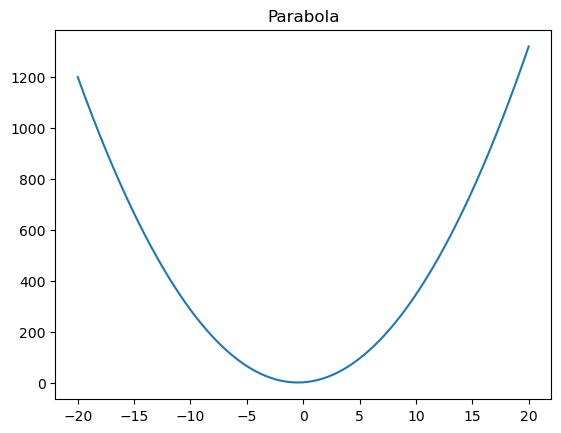

In [147]:
# Can use Matplotlib to plot the values
import matplotlib.pyplot as plt
plt.plot(points, output)
plt.title("Parabola")
plt.show()